# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group  prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_off_peak_fix': 'mean',
    'price_peak_var': 'mean', 
    'price_peak_fix': 'mean',
    'price_mid_peak_var': 'mean',
    'price_mid_peak_fix': 'mean' 
}).reset_index()
monthly_price_by_id.head()


,id,price_date,price_off_peak_var,price_off_peak_fix,price_peak_var,price_peak_fix,price_mid_peak_var,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969,0.103975,24.339581,0.070232,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885,0.105842,24.437330,0.073773,16.291555


In [6]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={
                    'price_off_peak_var': 'dec_off_peak_var',
                    'price_off_peak_fix': 'dec_off_peak_fix',
                    'price_peak_var': 'dec_peak_var',
                    'price_peak_fix': 'dec_peak_fix',
                    'price_mid_peak_var': 'dec_mid_peak_var',
                    'price_mid_peak_fix': 'dec_mid_peak_fix'}),
                jan_prices.drop(columns='price_date'), on='id')

# Calculate differences for off-peak, peak, and mid-peak energy and power
diff['offpeak_diff_dec_january_energy'] = diff['dec_off_peak_var'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_off_peak_fix'] - diff['price_off_peak_fix']

diff['peak_diff_dec_january_energy'] = diff['dec_peak_var'] - diff['price_peak_var']
diff['peak_diff_dec_january_power'] = diff['dec_peak_fix'] - diff['price_peak_fix']

diff['midpeak_diff_dec_january_energy'] = diff['dec_mid_peak_var'] - diff['price_mid_peak_var']
diff['midpeak_diff_dec_january_power'] = diff['dec_mid_peak_fix'] - diff['price_mid_peak_fix']

diff = diff[['id', 
             'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
             'peak_diff_dec_january_energy', 'peak_diff_dec_january_power',
             'midpeak_diff_dec_january_energy', 'midpeak_diff_dec_january_power']]

In [7]:
df2 = pd.merge(df, diff, on = 'id')
df2.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,42.629663,12.311304,8.182687,1,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,44.592310,0.000000,0.000000,0,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,44.612508,0.088409,0.000000,0,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,44.593296,0.000000,0.000000,0,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,40.848791,24.539003,16.365274,0,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166


monthly change in price can also be an important feature in churn analysis.

In [8]:
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']
     

columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df2 = pd.merge(df2, mean_prices[columns], on='id')
df2.head()
     

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,peak_diff_dec_january_energy,peak_diff_dec_january_power,midpeak_diff_dec_january_energy,midpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,-0.017912,-24.339581,-0.071536,-16.226389,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,0.000000,0.000000,0.000000,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000528,0.000000,0.000000,0.000000,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,0.000000,0.000000,0.000000,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,-0.002302,0.097749,0.003487,0.065166,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


Length of association of the customer with the client

In [9]:
days_in_year = 365.25
df2['tenure'] = ((df2['date_end'] - df2['date_activ']).dt.days / days_in_year).astype(int)
df2.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


customer with tenure length of 2,3,4( or less than 4) have more likely to churn.

Converting all datetime objects into months wrt to a reference date of 2016-01-01

In [10]:
def convert_into_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'D') / 30.44).astype(int)  # Average days in a month
    return months

    return months

reference_date = datetime(2016, 1, 1)

# Create columns
df2['months_activ'] = convert_into_months(reference_date, df2, 'date_activ')
df2['months_to_end'] = -convert_into_months(reference_date, df2, 'date_end')
df2['months_modif_prod'] = convert_into_months(reference_date, df2, 'date_modif_prod')
df2['months_renewal'] = convert_into_months(reference_date, df2, 'date_renewal')
     
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df2 = df2.drop(columns=remove)
df2.head()     

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,...,0.034219,0.058257,18.590255,7.450670,26.040925,3,30,5,2,6
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,...,0.007124,0.149609,44.311375,0.000000,44.311375,7,76,7,76,4
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,...,0.088421,0.170512,44.385450,0.000000,44.385450,6,68,3,68,8
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,...,0.000000,0.151210,44.400265,0.000000,44.400265,6,69,2,69,9
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,...,0.030773,0.051309,16.275263,8.137629,24.412893,6,71,2,71,9


In [11]:
df2 = df2.drop(columns=['Unnamed: 0'])

Handling Boolean data

In [12]:
df2['has_gas'] = df2['has_gas'].replace(['t', 'f'], [1, 0])
df2.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081887


customers with no gas are more likely to churn

Handling numerical data

In [13]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df2[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


In [14]:
#Apply log10 transformation
df2["cons_12m"] = np.log10(df2["cons_12m"] + 1)
df2["cons_gas_12m"] = np.log10(df2["cons_gas_12m"] + 1)
df2["cons_last_month"] = np.log10(df2["cons_last_month"] + 1)
df2["forecast_cons_12m"] = np.log10(df2["forecast_cons_12m"] + 1)
df2["forecast_cons_year"] = np.log10(df2["forecast_cons_year"] + 1)
df2["forecast_meter_rent_12m"] = np.log10(df2["forecast_meter_rent_12m"] + 1)
df2["imp_cons"] = np.log10(df2["imp_cons"] + 1)
     
df2[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.966450,1.517233,0.137282,0.050488,43.130085
std,0.884545,1.716828,1.769266,0.683612,1.584972,5.108355,0.571489,0.024623,0.049037,4.486140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.143166,0.084138,44.311378
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


/var/folders/rs/7j_w1ydj3wvd2yj4tmh0z56c0000gn/T/ipykernel_61374/1746383146.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df2["cons_12m"].dropna()), ax=axs[0])
/Users/kasturisaitejaswini/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kasturisaitejaswini/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values 

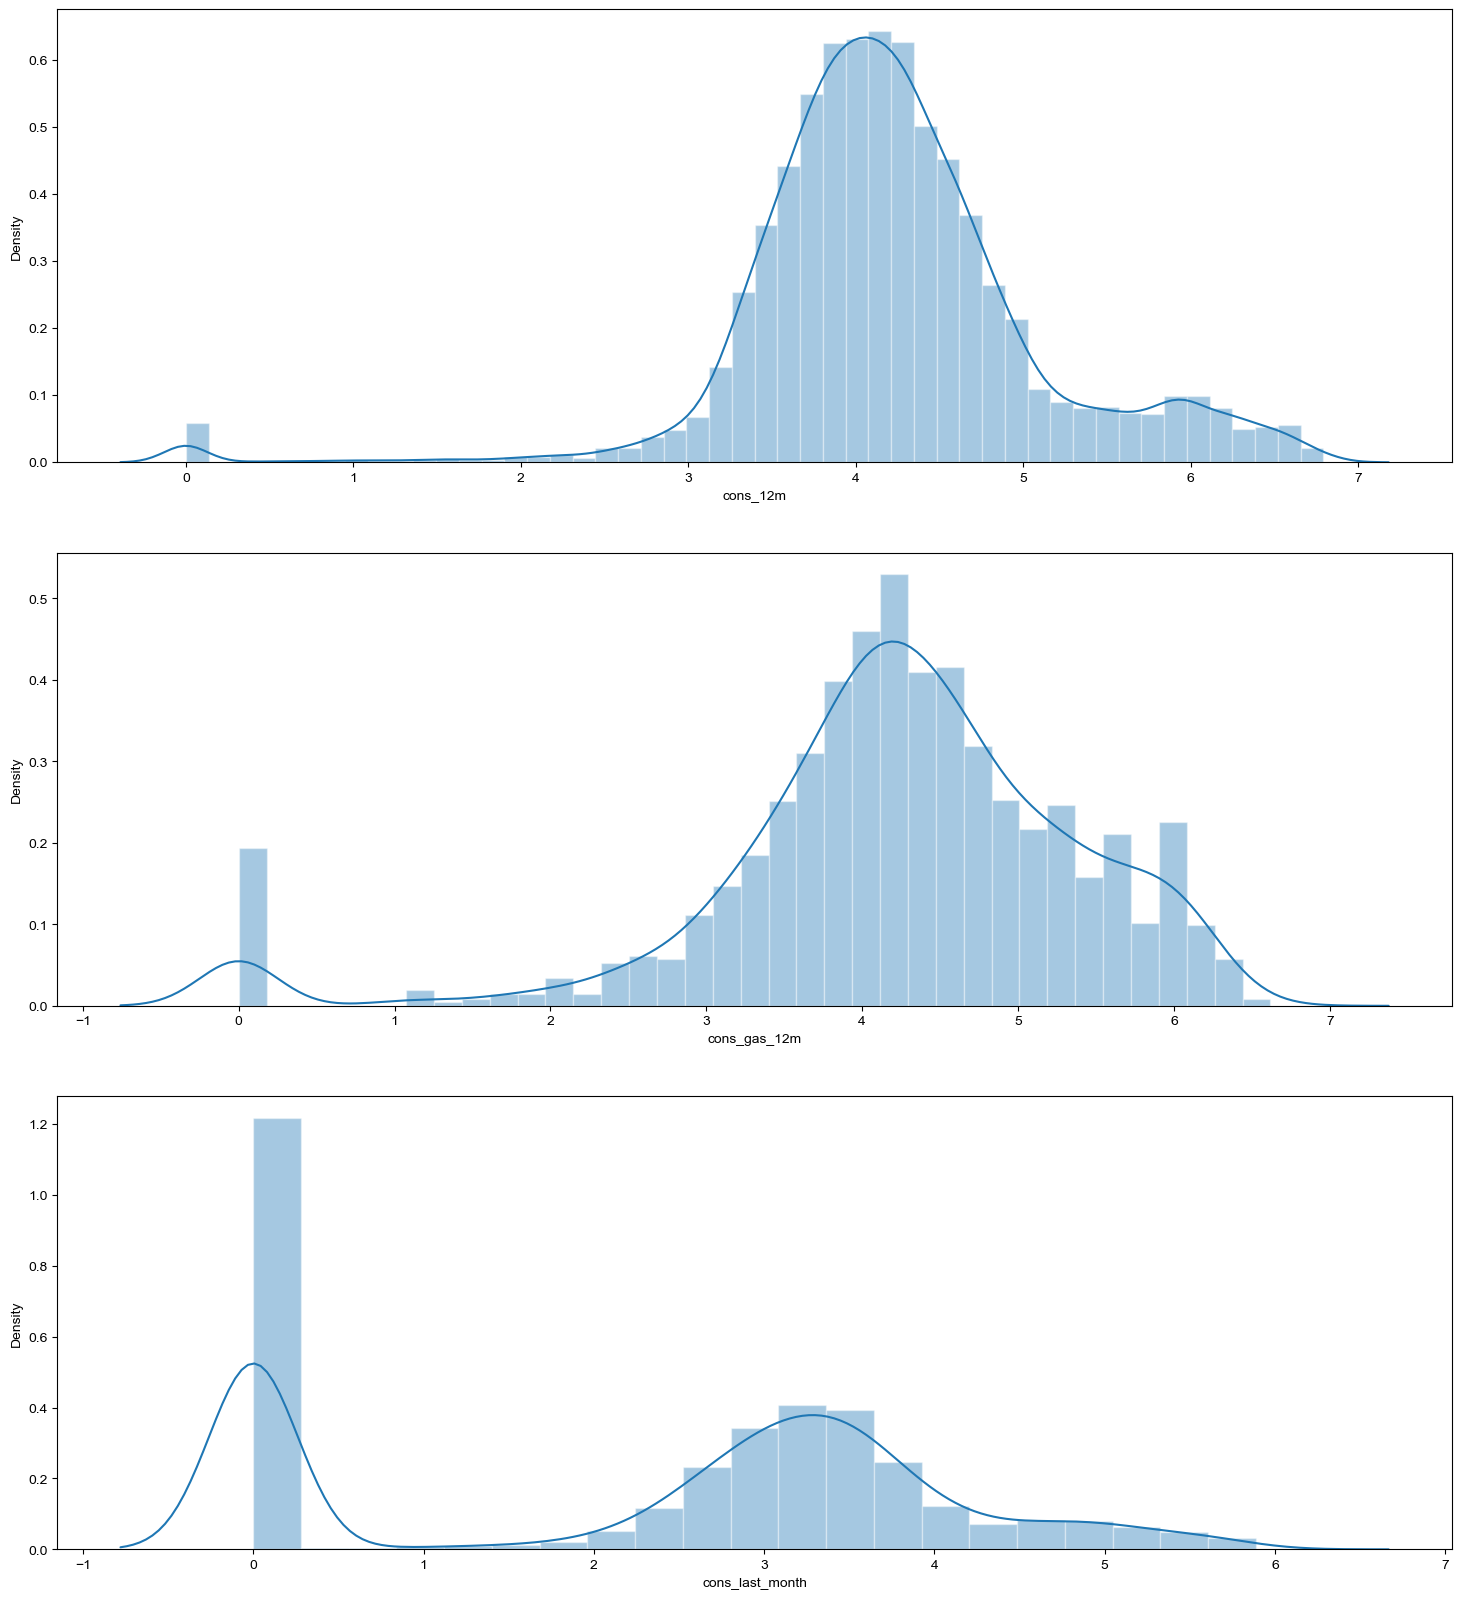

In [15]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
     
# Plot histograms
sns.distplot((df2["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df2[df2["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df2["cons_last_month"].dropna()), ax=axs[2])
plt.show()

Handling categorical data

In [16]:
# Transform into categorical type
df2['channel_sales'] = df2['channel_sales'].astype('category')

# Let's see how many categories are within this column
df2['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [17]:
df2 = pd.get_dummies(df2, columns=['channel_sales'], prefix='channel')
#df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df2.head()
     

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,False,False,False,False,True,False,False,False
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,0.000000,...,76,4,True,False,False,False,False,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,0.087899,...,68,8,False,False,False,False,True,False,False,False
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,0.000000,...,69,9,False,False,False,False,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,0.100015,...,71,9,True,False,False,False,False,False,False,False


In [18]:
# Transform into categorical type
df2['origin_up'] = df2['origin_up'].astype('category')

# Let's see how many categories are within this column
df2['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [19]:
df2 = pd.get_dummies(df2, columns=['origin_up'], prefix='origin_up')
df2 = df2.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df2.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,False,False,False,True,False,False,False,False,False,True
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,0.000000,...,False,False,False,False,False,False,False,True,False,False
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,0.087899,...,False,False,False,True,False,False,False,True,False,False
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,0.000000,...,False,False,False,False,True,False,False,True,False,False
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,0.100015,...,False,False,False,False,False,False,False,True,False,False


In [20]:

df2 = df2.drop(columns=['price_date_x', 'price_date_y', 'price_date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 75 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14605 non-null  object 
 1   cons_12m                                    14605 non-null  float64
 2   cons_gas_12m                                14605 non-null  float64
 3   cons_last_month                             14605 non-null  float64
 4   forecast_cons_12m                           14605 non-null  float64
 5   forecast_cons_year                          14605 non-null  float64
 6   forecast_discount_energy                    14605 non-null  float64
 7   forecast_meter_rent_12m                     14605 non-null  float64
 8   forecast_price_energy_off_peak              14605 non-null  float64
 9   forecast_price_energy_peak                  14605 non-null  float64
 10  forecast_p

Modelling

In [21]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
     


In [22]:
# Make a copy of our data
train_df = df2.copy()

# Separate target variable from independent variables
y = df2['churn']
X = df2.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14605, 73)
(14605,)
(10953, 73)
(10953,)
(3652, 73)
(3652,)


In [23]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
     

y_test.value_counts()

churn
0    3279
1     373
Name: count, dtype: int64

In [24]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 20
False positives: 1
True negatives: 3278
False negatives: 353

Accuracy: 0.9030668127053669
Precision: 0.9523809523809523
Recall: 0.05361930294906166


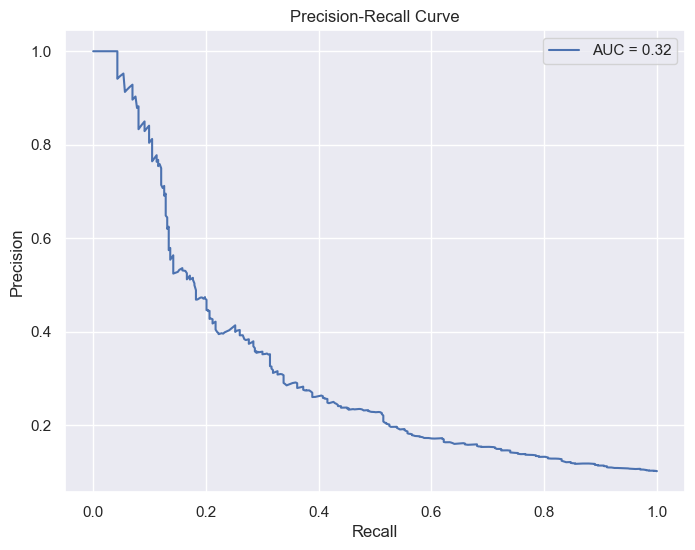

F1-score: 0.1015


In [25]:
from sklearn.metrics import precision_recall_curve, auc, f1_score

# Get predicted probabilities for the positive class
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)

# Calculate area under the precision-recall curve
auc_score = auc(recall, precision)

# Calculate F1-score
f1 = f1_score(y_test, predictions)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC = {auc_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Display F1-score
print(f'F1-score: {f1:.4f}')

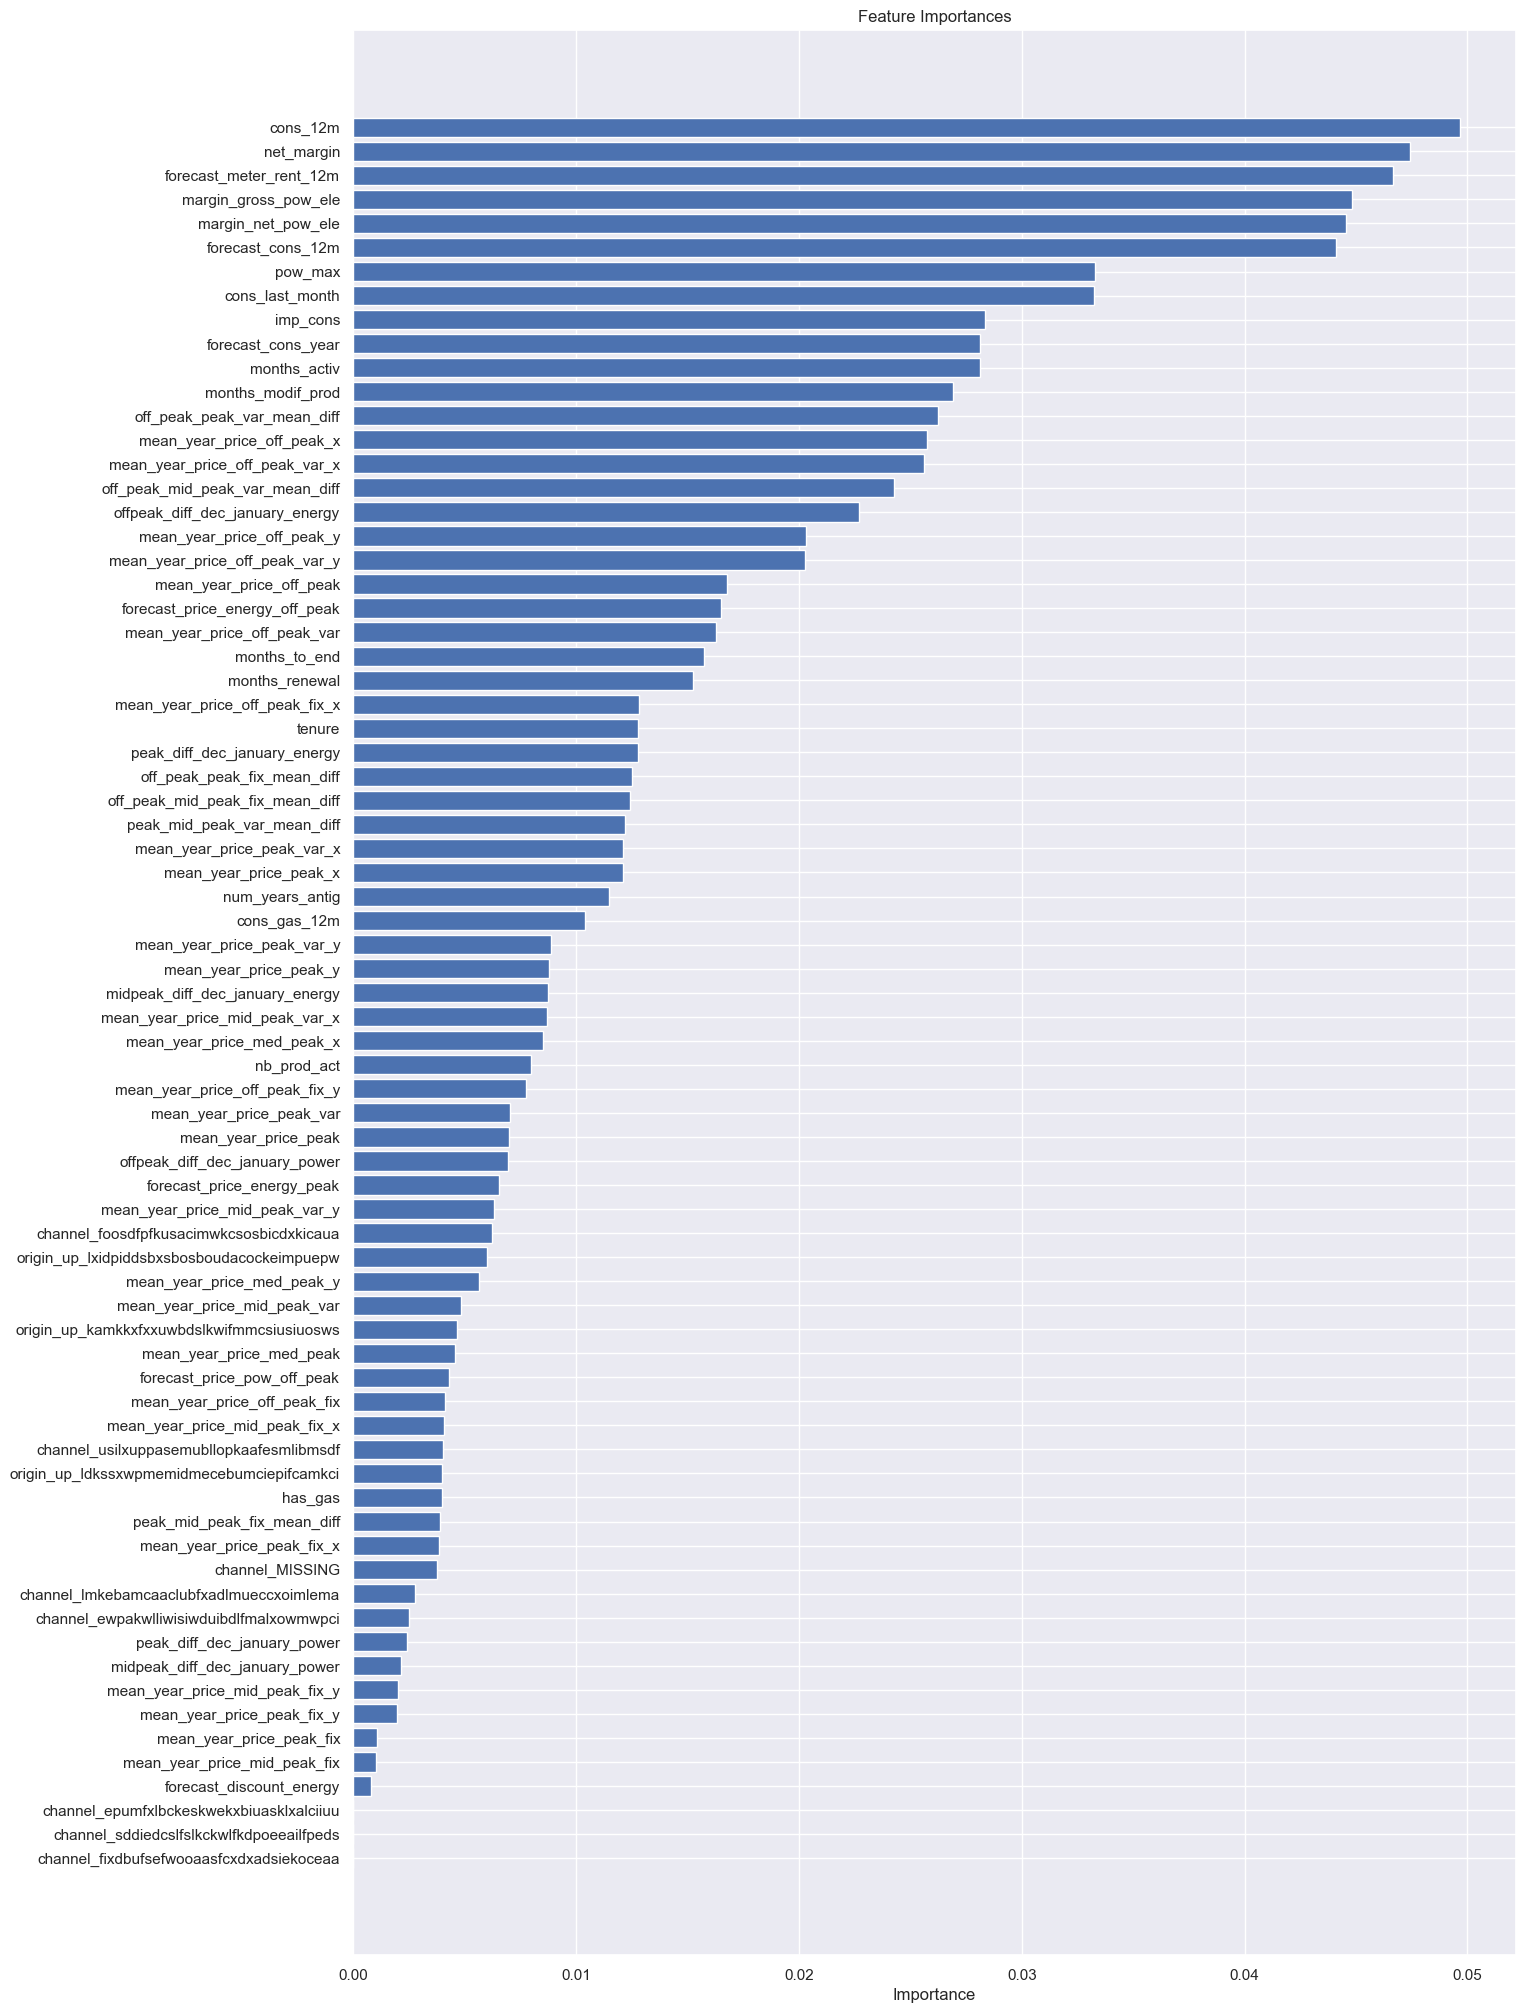

In [26]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
     

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()
     

Applying discount of 20% to check if churning rate reduces

In [27]:
# Step 1: Identify Current Churn Rate
total_customers = len(df2)
churned_customers = df2['churn'].sum()
current_churn_rate = (churned_customers / total_customers) * 100

# Step 2: Apply 20% Discount
df2['discounted_cons_12m'] = 0.8 * df2['cons_12m']

# Step 3: Re-calculate Churn Rate with Discount
discounted_churned_customers = df2[df2['discounted_cons_12m'] > 0]['churn'].sum()
churn_rate_with_discount = (discounted_churned_customers / total_customers) * 100

# Step 4: Compare Churn Rates
reduction_in_churn_rate = ((current_churn_rate - churn_rate_with_discount) / current_churn_rate) * 100

# Print Results
print(f"Current Churn Rate: {current_churn_rate:.2f}%")
print(f"Churn Rate with 20% Discount: {churn_rate_with_discount:.2f}%")
print(f"Reduction in Churn Rate: {reduction_in_churn_rate:.2f}%")

Current Churn Rate: 9.72%
Churn Rate with 20% Discount: 9.65%
Reduction in Churn Rate: 0.70%


In [28]:
threshold = 0.5
predicted_proba = model.predict_proba(X_test)[:, 1]
predictions = (predicted_proba > threshold).astype(int)

# Calculate financial impact
churned_customers = X_test[predictions == 1]  # Select churned customers
revenue_loss = churned_customers['net_margin'].sum()  # Assuming 'net_margin' represents revenue

# Display financial impact
print(f"Estimated revenue loss from churned customers: {revenue_loss}")

# Evaluate model performance
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

Estimated revenue loss from churned customers: 2614.3799999999997
True positives: 20
False positives: 1
True negatives: 3278
False negatives: 353
Accuracy: 0.9030668127053669
Precision: 0.9523809523809523
Recall: 0.05361930294906166


The financial impact is calculated by summing the net margin of customers predicted to churn. Also it is assumed that the 'net_margin' column represents revenue and that a higher net margin is better. 

1. 20% discount might not be a good factor to reduce churning.
2. The model has a high accuracy (90.3%), but the recall is low (5.4%), indicating that the model might be missing many positive cases (churned customers). The precision is high (90.9%), but this could be influenced by the class imbalance in the dataset. 
3. Advantages and Disadvantages of Random Forest:

Advantages:

Handles both numerical and categorical features well.
Robust to overfitting, as it averages predictions from multiple trees.
Provides feature importance, helping to understand the impact of each feature on predictions.

Disadvantages:

Can be computationally expensive for large datasets.
May not perform well on highly imbalanced datasets without proper handling.
The model's predictions might be hard to interpret for stakeholders.

4. Calculating exact savings would require more information on the cost of acquiring new customers, the revenue generated by retained customers, and other business-specific metrics.
